# Hand Gesture Prediction Using CNN

This project aims to build a Convolutional Neural Network (CNN) to predict hand gestures. The following code snippets demonstrate the process of importing necessary libraries, data preprocessing, model creation, training, and evaluation.

## Importing Libraries

First, we need to import the necessary libraries for data manipulation, visualization, and building the CNN model.

- `numpy` and `pandas` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- `keras` for building the CNN model
- `tensorflow.keras.preprocessing.image.ImageDataGenerator` for augmenting the image data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Loading the Dataset

Next, we load the datasets for training and testing. The datasets contain images of hand gestures along with their corresponding labels.

- `sign_mnist_train.csv`: The training dataset
- `sign_mnist_test.csv`: The testing dataset

We use `pandas` to read these CSV files and store them in dataframes.


In [7]:
# Train datasets

train_df = pd.read_csv("Dataset/sign_mnist_train.csv")

# Test datasets

test_df = pd.read_csv("Dataset/sign_mnist_test.csv")

#### Exploring the Training Dataset

To understand the structure of the training dataset

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


#### Exploring the Test Dataset

To understand the structure of the test dataset

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


#### Descriptive Statistics of the Training Dataset

In [11]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


#### Separating Labels and Features

In this step, we separate the labels and features in the training dataset.

In [12]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


## Reshaping the Training Data

The feature set `trainset` is converted to a numpy array and reshaped to fit the input shape required by the CNN model.

- The `values` attribute of the dataframe is used to convert it into a numpy array.
- The `reshape` method is used to reshape the data into a 4D tensor with dimensions (-1, 28, 28, 1), where:
  - `-1` indicates that the number of samples will be inferred automatically
  - `28, 28` are the dimensions of the images
  - `1` indicates that the images are grayscale

Finally, we print the shape


In [13]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


## Preparing the Test Data

Similarly to the training data, we prepare the test data by separating the labels and features.

- `test_label`: Contains the labels from the testing dataset.
- `X_test`: Contains the feature variables by dropping the `label` column from the testing dataset.

We print the shape of the test features to confirm the dimensions and display the first few entries of `X_test`.


In [14]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


## Encoding the Labels

Before training the model, we need to encode the labels using one-hot encoding. This step is necessary because our CNN model will output probabilities for each class, and one-hot encoding transforms the labels into a format suitable for this.

- We use `LabelBinarizer` from `sklearn.preprocessing` to perform one-hot encoding.
- `y_train`: Contains the one-hot encoded labels for the training set.
- `y_test`: Contains the one-hot encoded labels for the test set.

The `fit_transform` method is used to fit the `LabelBinarizer` on the training labels and transform them into one-hot encoded vectors.


In [15]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

## Inspecting the Encoded Training Labels

After encoding the labels, we can inspect the resulting one-hot encoded vectors. The `y_train` variable now contains the one-hot encoded labels for the training set. This step is crucial to ensure that the labels are correctly transformed before feeding them into the CNN model.


In [16]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## Reshaping the Test Data

Similar to the training data, we reshape the test data to fit the input shape required by the CNN model.

- The `values` attribute is used to convert `X_test` into a numpy array.
- The `reshape` method reshapes the data into a 4D tensor with dimensions (-1, 28, 28, 1), where:
  - `-1` indicates that the number of samples will be inferred automatically.
  - `28, 28` are the dimensions of the images.
  - `1` indicates that the images are grayscale.

This step ensures that the test data is prepared in the same format as the training data for consistent model input.


In [17]:
X_test=X_test.values.reshape(-1,28,28,1)

## Shape of Data Arrays

To verify the dimensions of our data arrays after preprocessing, we print the shapes of the training and test datasets.

- `X_train.shape`: Shape of the training feature set (`X_train`), which should be (number of samples, height, width, channels).
- `y_train.shape`: Shape of the training labels (`y_train`), which should be (number of samples, number of classes after one-hot encoding).
- `X_test.shape`: Shape of the test feature set (`X_test`), which should be (number of samples, height, width, channels).
- `y_test.shape`: Shape of the test labels (`y_test`), which should be (number of samples, number of classes after one-hot encoding).

This step ensures that all datasets are properly shaped and ready for model training and evaluation.


In [18]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


## Data Augmentation for Training Data

To improve the robustness and generalization of our model, we apply data augmentation techniques to the training data using `ImageDataGenerator` from `tensorflow.keras.preprocessing.image`.

- `rescale`: Rescales the pixel values of images to the range [0, 1].
- `rotation_range`, `height_shift_range`, `width_shift_range`, `shear_range`, `zoom_range`, `horizontal_flip`, `fill_mode`: Various parameters for augmenting the images by rotating, shifting, shearing, zooming, flipping horizontally, and filling in new pixels.

These techniques help the model generalize better by exposing it to a wider variety of augmented images during training.

Additionally, we normalize the pixel values of `X_test` by dividing by 255 to ensure consistency in data preprocessing.


In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

## Preview of Dataset

The following code snippet generates a visual preview of sample images from the training dataset. Each subplot displays an image along with its corresponding label and letter.

- The `imshow` function from `matplotlib.pyplot` is used to display the images with a grayscale colormap (`cmap='gray'`).
- `fig.suptitle` sets the title of the entire figure.
- Each subplot (`axe[0,0]` to `axe[1,1]`) shows a different image along with its label and corresponding letter.

This visualization helps to get a quick overview of the dataset and verify that the images and labels are correctly aligned.


Text(0.5, 1.0, 'label: 13  letter: M')

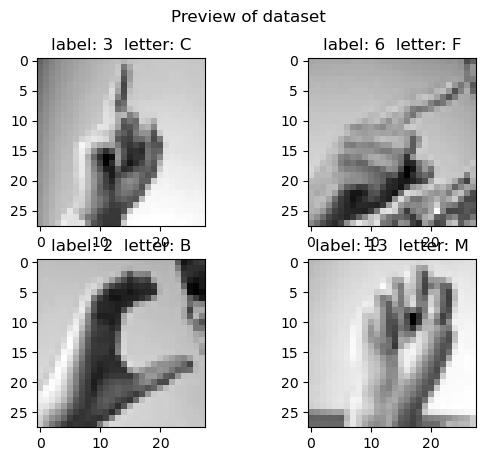

In [20]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

## Building the Convolutional Neural Network (CNN) Model

We define a Sequential model for the CNN architecture to classify hand gestures.

- The model begins with a `Conv2D` layer with 128 filters, each of size 5x5, using ReLU activation, and input shape (28, 28, 1).
- A `MaxPool2D` layer follows with a pool size of 3x3 and strides of 2, using 'same' padding.
- The next `Conv2D` layer has 64 filters of size 2x2, also using ReLU activation and 'same' padding.
- Another `MaxPool2D` layer follows with a pool size of 2x2 and strides of 2.
- Finally, a third `Conv2D` layer has 32 filters of size 2x2, ReLU activation, and 'same' padding.
- Another `MaxPool2D` layer with a pool size of 2x2 and strides of 2 follows.

The `Flatten()` layer is added to convert the 2D feature maps into a 1D vector, which will be fed into the fully connected layers for classification.


In [21]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Adding Fully Connected Layers

We add fully connected (Dense) layers to the CNN model for classification.

- `Dense(units=512, activation='relu')`: Adds a dense layer with 512 units and ReLU activation function.
- `Dropout(rate=0.25)`: Applies dropout regularization with a rate of 25% to prevent overfitting.
- `Dense(units=24, activation='softmax')`: Adds the output layer with 24 units (corresponding to the number of classes) and softmax activation function for multi-class classification.

The `summary()` method prints a summary of the model architecture, displaying the number of parameters and the output shape at each layer.


In [22]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,352 (1.22 MB)

 Trainable params: 319,352 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

Before training, we compile the CNN model with the specified optimizer, loss function, and metrics.

- `optimizer='adam'`: Uses the Adam optimizer, which is well-suited for training neural networks.
- `loss='categorical_crossentropy'`: Specifies categorical crossentropy as the loss function, suitable for multi-class classification tasks.
- `metrics=['accuracy']`: Evaluates the model's performance based on accuracy during training and testing.

Compiling the model prepares it for training by configuring the learning process.


In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training the Model

We train the compiled CNN model using the `fit` method.

- `train_datagen.flow(X_train, y_train, batch_size=200)`: Generates batches of augmented data from `X_train` and `y_train` using the previously defined `train_datagen`.
  - `batch_size=200`: Specifies the batch size for training.

- `epochs=35`: Number of epochs (iterations over the entire dataset) to train the model.

- `validation_data=(X_test, y_test)`: Optional validation data to evaluate the model performance after each epoch on data not used for training.

- `shuffle=1`: Shuffles the training data before each epoch.

The `fit` method trains the model on the training data and validates it on the validation data if provided, while also tracking metrics such as loss and accuracy over epochs.



In [24]:
history= model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.0737 - loss: 3.1070 - val_accuracy: 0.2853 - val_loss: 2.3400
Epoch 2/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 27s 190ms/step - accuracy: 0.2501 - loss: 2.4168 - val_accuracy: 0.5254 - val_loss: 1.3898
Epoch 3/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 25s 178ms/step - accuracy: 0.4299 - loss: 1.7547 - val_accuracy: 0.6755 - val_loss: 0.9585
Epoch 4/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 198ms/step - accuracy: 0.5481 - loss: 1.3570 - val_accuracy: 0.7591 - val_loss: 0.7317
Epoch 5/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 199ms/step - accuracy: 0.6225 - loss: 1.1184 - val_accuracy: 0.7425 - val_loss: 0.7006
Epoch 6/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 184ms/step - accuracy: 0.6938 - loss: 0.9014 - val_accuracy: 0.8116 - val_loss: 0.5178
Epoch 7/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 27s 193ms/step - accuracy: 0.7367 - loss: 0.7872 - val_accuracy: 0.8551 - val_loss: 0.4291
Epoch 8/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 27s 192ms/step - accuracy: 0.7720 - loss: 0.6835 - val

## Evaluating the Model

We evaluate the trained CNN model using the `evaluate` method.

- `x=X_test, y=y_test`: Specifies the test data (`X_test` and `y_test`) to evaluate the model's performance.

The `evaluate` method returns a tuple containing the loss value and accuracy score achieved by the model on the test data.



In [25]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9925 - loss: 0.0232


## Displaying Model Accuracy

To present the model's accuracy in a human-readable format, we print it as a percentage.

- `acc`: Accuracy score obtained from evaluating the model on the test data.

The printed statement displays the model accuracy as a percentage.



In [26]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 99.02397990226746%


## Plotting Training and Validation Metrics

We visualize the training and validation metrics (accuracy and loss) over epochs using matplotlib.

- The first subplot (`plt.subplot(1, 2, 1)`) plots the model accuracy (`accuracy` and `val_accuracy`) over epochs.
  - `history.history['accuracy']`: Training accuracy values stored during model training.
  - `history.history['val_accuracy']`: Validation accuracy values stored during model training.

- The second subplot (`plt.subplot(1, 2, 2)`) plots the model loss (`loss` and `val_loss`) over epochs.
  - `history.history['loss']`: Training loss values stored during model training.
  - `history.history['val_loss']`: Validation loss values stored during model training.

Each plot includes labels, titles, and legends to enhance readability. The `plt.tight_layout()` ensures that subplots are neatly arranged, and `plt.show()` displays the plots.



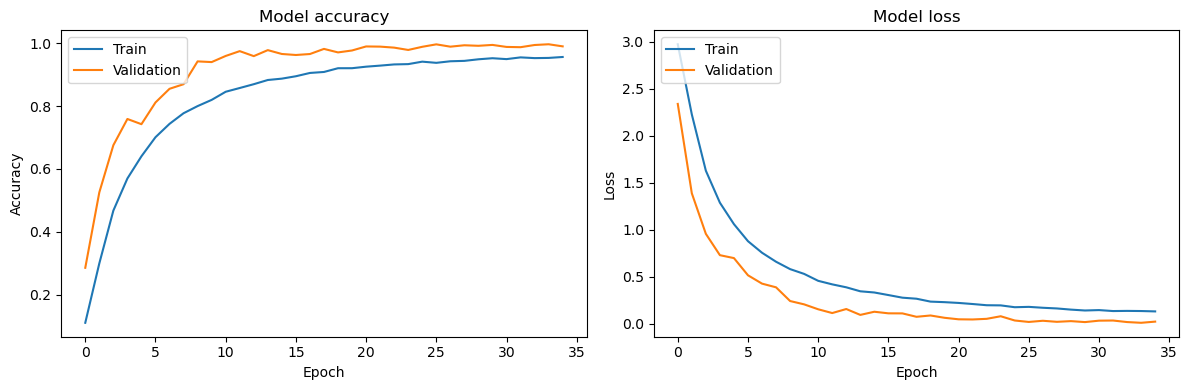

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Visualizing the Confusion Matrix

We generate and display the confusion matrix to evaluate the model's performance in predicting hand gestures.

- `y_pred`: Predicted probabilities for each class obtained from the model's predictions on `X_test`.
- `y_pred_classes`: Predicted class labels (indices of maximum probabilities) for each sample in `X_test`.
- `y_true`: True class labels for each sample in `y_test`.

The `plot_confusion_matrix` function calculates the confusion matrix using `confusion_matrix` from `sklearn.metrics`. It then plots the matrix using `sns.heatmap` from `seaborn`, with annotations (`annot=True`) to display the numeric values, using a blue color map (`cmap="Blues"`).

The x-axis (`Predicted Label`) and y-axis (`True Label`) are labeled accordingly, and the title (`Confusion Matrix`) summarizes the purpose of the plot.



225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


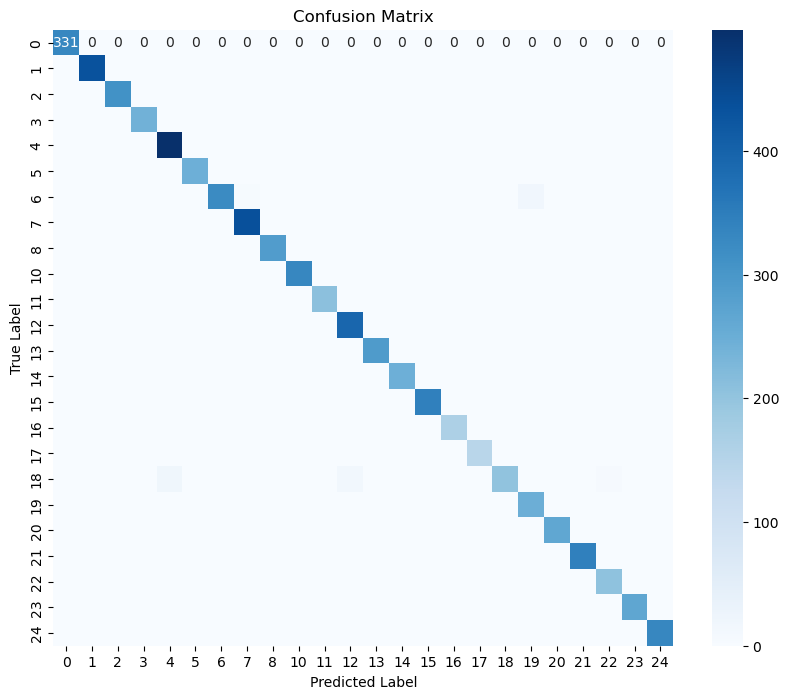

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

def plot_confusion_matrix(y_true, y_pred_classes):
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_true, y_pred_classes)

## Classification Report

We generate and print the classification report to evaluate the precision, recall, F1-score, and support for each class.

- `classification_report(y_true, y_pred_classes, target_names=[getLetter(i) for i in range(len(lb.classes_))])`: Computes and prints a detailed classification report using `classification_report` from `sklearn.metrics`.
  - `y_true`: True class labels for each sample in `y_test`.
  - `y_pred_classes`: Predicted class labels (indices of maximum probabilities) for each sample in `X_test`.
  - `target_names`: Optional parameter specifying the display names for each class, obtained using `getLetter(i)` function for each class index.

## Distribution of Labels in Training Set

We visualize the distribution of labels in the training set using a bar plot.

- `sns.countplot(x=train_label)`: Generates a count plot of `train_label` using `countplot` from `seaborn`.
- `ax.set_xticklabels(class_labels)`: Sets the x-axis tick labels to actual letter representations obtained from `getLetter(i)` function for each class index.
- Annotations (`ax.annotate`) are added on top of each bar to display the count of samples for each class.

The plot provides insights into the distribution of different hand gesture labels in the training dataset.



In [29]:
# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=[getLetter(i) for i in range(len(lb.classes_))]))

# Distribution of Labels in Training Set
import seaborn as sns

# Class labels mapping
class_labels = [getLetter(i) for i in range(len(lb.classes_))]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x=train_label)

# Set labels for x-axis with actual letter representation
ax.set_xticklabels(class_labels)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

NameError: name 'getLetter' is not defined

# https://www.kaggle.com/code/sayakdasgupta/sign-language-classification-cnn-99-40-accuracy/notebook

## Mapping Labels to Letters

The `getLetter` function maps numeric labels to corresponding letters based on a predefined dictionary (`classLabels`).

- `result`: Input parameter representing the numeric label.
- `classLabels`: Dictionary mapping numeric labels (0-24) to letters ('A'-'Z').

If `result` is a valid integer within the dictionary keys, the function returns the corresponding letter. Otherwise, it returns "Error".

This function is useful for converting numeric predictions or labels back into their corresponding letter representations.


In [ ]:
# Create function to match label to letter

def getLetter(result):
  classLabels ={
      0:'A',
      1:'B',
      2:'C',
      3:'D',
      4:'E',
      5:'F',
      6:'G',
      7:'H',
      8:'I',
      9:'K',
      10:'L',
      11:'M',
      12:'N',
      13:'O',
      14:'P',
      15:'Q',
      16:'R',
      17:'S',
      18:'T',
      19:'U',
      20:'V',
      21:'W',
      22:'X',
      23:'Y',
      24:'Z'}

  try:
    res = int(result)
    return classLabels[res]
  except:
    return "Error"

## Real-time Hand Gesture Recognition Using OpenCV and Trained Model

This code snippet demonstrates real-time hand gesture recognition using a webcam (assuming `model` and `getLetter` functions are defined beforehand).

- `cap = cv2.VideoCapture(0)`: Initializes the webcam capture using OpenCV.

- Inside the `while True` loop:
  - `ret, frame = cap.read()`: Reads a frame from the webcam.
  - `cv2.flip(frame, 1)`: Flips the frame horizontally (mirror effect).
  - Defines a region of interest (ROI) by cropping the frame (`frame[100:400, 320:620]`) and displays it using `cv2.imshow`.

  - Converts the ROI to grayscale (`cv2.cvtColor`) and resizes it to (28, 28) pixels.

  - Draws a rectangle (`cv2.rectangle`) around the ROI on a copy of the frame (`copy`).

  - Reshapes the ROI (`roi.reshape(-1, 28, 28, 1)`) to match the input shape required by the model for prediction.

  - Uses the trained `model` to predict (`model.predict`) the gesture in the ROI and determines the predicted class (`np.argmax(predictions[0])`).

  - Retrieves the corresponding letter using the `getLetter` function and displays it on the frame using `cv2.putText`.

  - Displays the modified frame (`cv2.imshow('frame', copy)`).

- `if cv2.waitKey(1) == 13:`: Checks if the 'Enter' key is pressed to break out of the loop.

- `cap.release()` and `cv2.destroyAllWindows()`: Releases the webcam capture and closes all OpenCV windows when the loop ends.

This setup allows real-time detection and recognition of hand gestures using a pre-trained CNN model and OpenCV for video input and display.


In [ ]:
import numpy as np
import cv2

# Assuming model and getLetter are defined before this code

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    # Define region of interest (ROI)
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (0, 255, 0), 5)

    roi = roi.reshape(-1, 28, 28, 1)

    # Use predict method instead of predict_classes
    predictions = model.predict(roi)
    predicted_class = np.argmax(predictions[0])

    result = str(predicted_class)
    cv2.putText(copy, getLetter(result), (320, 90), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:  # Press 'Enter' key to break the loop
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━